#### To use the Random Forest Survival analysis you will need to use the Pysurvival package.
To install this package please follow the instructions from this site https://square.github.io/pysurvival/installation.html
##### For MacOS users:
You will need to add two more lines besides the recommended 2 as shown below:
###### Note: please check which version of gcc do you have as it might be different from 9.3.0.



### To use the Random Forest Survival analysis we need to load the data and remove the colinear features

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### using the panda reader import your file where the data is contained

In [2]:
clinical_data=pd.read_excel('clin_data_dim1_only.xlsx')

clinical_data

,filename,FFLP,FFLP_in_months,diagnostics_Image-original_Mean,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,18284004043,0,0.8,0.085291,206.351060,191.512165,228.461403,1.516300e+06,125.444723,0.602862,...,4.984794e-13,4.984794e-13,-3.203427e-16,7.060307e-07,0.000000e+00,0,1000000,0,0.000000,0.000000e+00
1,20243743626,0,1.1,0.066494,137.568410,149.512940,168.919628,8.994795e+05,109.224397,0.749403,...,5.000000e-01,5.000000e-01,1.000000e+00,5.299866e-06,3.560127e+10,0,1000000,0,0.000000,0.000000e+00
2,20444767425,1,36.3,0.084962,191.981316,218.335061,226.247648,1.488096e+06,114.298757,0.739233,...,2.565687e-12,2.565687e-12,-3.203427e-16,1.601776e-06,0.000000e+00,0,1000000,0,0.000000,0.000000e+00
3,20525126502,1,2.0,0.062180,266.796480,295.046283,300.551338,3.100770e+06,150.802062,0.616919,...,1.605260e-12,1.605260e-12,-3.203427e-16,1.266989e-06,0.000000e+00,0,1000000,0,0.000000,0.000000e+00
4,20542019984,1,2.5,0.054680,478343.000000,1.000000,0.274078,1.744043e-02,0.442152,0.654056,...,1.000000e+00,0.000000e+00,1.000000e+00,2.288120e+11,2.288120e+11,228812025649,1,1,1.000000,4.370400e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,211310175445,1,3.8,0.063273,938032.000000,1.000000,0.219055,1.123862e-01,0.255243,0.625670,...,1.000000e+00,0.000000e+00,1.000000e+00,8.799040e+11,8.799040e+11,879904033024,1,1,1.000000,1.136488e-12
80,211401772640,1,9.5,0.044872,565274.000000,1.000000,0.267947,1.417342e-01,1.000000,0.766636,...,1.000000e+00,0.000000e+00,1.000000e+00,3.195347e+11,3.195347e+11,319534695076,1,1,1.000000,3.129551e-12
81,211502540723,1,4.4,0.074059,629500.000000,1.000000,0.272925,3.144191e-02,0.790224,0.804265,...,1.000000e+00,0.000000e+00,1.000000e+00,3.962702e+11,3.962702e+11,396270250000,1,1,1.000000,2.523530e-12
82,211545340988,1,13.1,0.081775,883970.000000,3.000000,0.281658,6.112728e-02,0.353797,0.668528,...,1.000000e+00,0.000000e+00,1.000000e+00,2.604052e+11,2.604052e+11,260405192044,1,1,0.333333,2.396259e-04


In [3]:
# originally this step manually removes excluded rows, but this was done beforehand already
data=clinical_data.drop([]).reset_index(drop=True)

data.columns

Index(['filename', 'FFLP', 'FFLP_in_months', 'diagnostics_Image-original_Mean',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       ...
       'original_glszm_SmallAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength'],
      dtype='object', length=106)

In [4]:
data['time column']=clinical_data['FFLP_in_months']
data['event column']=clinical_data['FFLP']
data

,filename,FFLP,FFLP_in_months,diagnostics_Image-original_Mean,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,time column,event column
0,18284004043,0,0.8,0.085291,206.351060,191.512165,228.461403,1.516300e+06,125.444723,0.602862,...,-3.203427e-16,7.060307e-07,0.000000e+00,0,1000000,0,0.000000,0.000000e+00,0.8,0
1,20243743626,0,1.1,0.066494,137.568410,149.512940,168.919628,8.994795e+05,109.224397,0.749403,...,1.000000e+00,5.299866e-06,3.560127e+10,0,1000000,0,0.000000,0.000000e+00,1.1,0
2,20444767425,1,36.3,0.084962,191.981316,218.335061,226.247648,1.488096e+06,114.298757,0.739233,...,-3.203427e-16,1.601776e-06,0.000000e+00,0,1000000,0,0.000000,0.000000e+00,36.3,1
3,20525126502,1,2.0,0.062180,266.796480,295.046283,300.551338,3.100770e+06,150.802062,0.616919,...,-3.203427e-16,1.266989e-06,0.000000e+00,0,1000000,0,0.000000,0.000000e+00,2.0,1
4,20542019984,1,2.5,0.054680,478343.000000,1.000000,0.274078,1.744043e-02,0.442152,0.654056,...,1.000000e+00,2.288120e+11,2.288120e+11,228812025649,1,1,1.000000,4.370400e-12,2.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,211310175445,1,3.8,0.063273,938032.000000,1.000000,0.219055,1.123862e-01,0.255243,0.625670,...,1.000000e+00,8.799040e+11,8.799040e+11,879904033024,1,1,1.000000,1.136488e-12,3.8,1
80,211401772640,1,9.5,0.044872,565274.000000,1.000000,0.267947,1.417342e-01,1.000000,0.766636,...,1.000000e+00,3.195347e+11,3.195347e+11,319534695076,1,1,1.000000,3.129551e-12,9.5,1
81,211502540723,1,4.4,0.074059,629500.000000,1.000000,0.272925,3.144191e-02,0.790224,0.804265,...,1.000000e+00,3.962702e+11,3.962702e+11,396270250000,1,1,1.000000,2.523530e-12,4.4,1
82,211545340988,1,13.1,0.081775,883970.000000,3.000000,0.281658,6.112728e-02,0.353797,0.668528,...,1.000000e+00,2.604052e+11,2.604052e+11,260405192044,1,1,0.333333,2.396259e-04,13.1,1


In [5]:
data1=data.drop(columns=['filename'])
data1.to_csv('for_survival.csv')

In [6]:
lola=data1.iloc[:,0:255]
lola.columns

Index(['FFLP', 'FFLP_in_months', 'diagnostics_Image-original_Mean',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea',
       ...
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'time column',
       'event column'],
      dtype='object', length=107)

In [7]:
time_column='time column'
event_column='event column'
features=np.setdiff1d(data1.columns, [time_column, event_column]).tolist()
features

['FFLP',
 'FFLP_in_months',
 'diagnostics_Image-original_Mean',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'original_glcm_ClusterTendency',
 'original_glcm_Contrast',
 'original_glcm_Correlation',
 'original_glcm_DifferenceAverage',
 'original_glcm_DifferenceEntropy',
 'original_glcm_DifferenceVari

### We will be using Variance Inflation Factor to remove the colinear features
In the RFS analysis it is very important to remove the colinear features

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=20.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [10]:
lola

,FFLP,FFLP_in_months,diagnostics_Image-original_Mean,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,time column,event column
0,0,0.8,0.085291,206.351060,191.512165,228.461403,1.516300e+06,125.444723,0.602862,105874.065668,...,-3.203427e-16,7.060307e-07,0.000000e+00,0,1000000,0,0.000000,0.000000e+00,0.8,0
1,0,1.1,0.066494,137.568410,149.512940,168.919628,8.994795e+05,109.224397,0.749403,60130.657090,...,1.000000e+00,5.299866e-06,3.560127e+10,0,1000000,0,0.000000,0.000000e+00,1.1,0
2,1,36.3,0.084962,191.981316,218.335061,226.247648,1.488096e+06,114.298757,0.739233,85268.758820,...,-3.203427e-16,1.601776e-06,0.000000e+00,0,1000000,0,0.000000,0.000000e+00,36.3,1
3,1,2.0,0.062180,266.796480,295.046283,300.551338,3.100770e+06,150.802062,0.616919,166687.329564,...,-3.203427e-16,1.266989e-06,0.000000e+00,0,1000000,0,0.000000,0.000000e+00,2.0,1
4,1,2.5,0.054680,478343.000000,1.000000,0.274078,1.744043e-02,0.442152,0.654056,0.465568,...,1.000000e+00,2.288120e+11,2.288120e+11,228812025649,1,1,1.000000,4.370400e-12,2.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1,3.8,0.063273,938032.000000,1.000000,0.219055,1.123862e-01,0.255243,0.625670,0.432181,...,1.000000e+00,8.799040e+11,8.799040e+11,879904033024,1,1,1.000000,1.136488e-12,3.8,1
80,1,9.5,0.044872,565274.000000,1.000000,0.267947,1.417342e-01,1.000000,0.766636,0.594034,...,1.000000e+00,3.195347e+11,3.195347e+11,319534695076,1,1,1.000000,3.129551e-12,9.5,1
81,1,4.4,0.074059,629500.000000,1.000000,0.272925,3.144191e-02,0.790224,0.804265,0.595326,...,1.000000e+00,3.962702e+11,3.962702e+11,396270250000,1,1,1.000000,2.523530e-12,4.4,1
82,1,13.1,0.081775,883970.000000,3.000000,0.281658,6.112728e-02,0.353797,0.668528,0.382030,...,1.000000e+00,2.604052e+11,2.604052e+11,260405192044,1,1,0.333333,2.396259e-04,13.1,1


In [11]:
#VIF of 10 means that all the features with R^2 above 0.9 will removed
X = lola
data2 = calculate_vif_(X, 10)

dropping 'original_glszm_LargeAreaEmphasis' at index: 88
dropping 'original_glcm_JointEnergy' at index: 47
dropping 'original_ngtdm_Busyness' at index: 98
dropping 'original_glszm_LargeAreaHighGrayLevelEmphasis' at index: 87
dropping 'original_glcm_Idmn' at index: 41
dropping 'original_glcm_Idn' at index: 41
dropping 'original_glcm_JointAverage' at index: 44
dropping 'original_glcm_JointEntropy' at index: 44
dropping 'original_glrlm_GrayLevelNonUniformityNormalized' at index: 64
dropping 'original_glrlm_ShortRunHighGrayLevelEmphasis' at index: 76
dropping 'original_glrlm_ShortRunLowGrayLevelEmphasis' at index: 76
dropping 'original_glrlm_LongRunEmphasis' at index: 66
dropping 'original_glrlm_LongRunLowGrayLevelEmphasis' at index: 67
dropping 'original_gldm_LargeDependenceHighGrayLevelEmphasis' at index: 57
dropping 'original_gldm_LargeDependenceLowGrayLevelEmphasis' at index: 57
dropping 'original_glrlm_LowGrayLevelRunEmphasis' at index: 65
dropping 'time column' at index: 89
dropping 

In [12]:
data2_temp = data2

In [13]:
#This looked like it was manually extracting the non-colinear features
#Commented out, instead, I am using the retun value from the calculate_vif_ function
#creating a new dataframe with colinear features removed
#data2=data1.loc[:, ['LBP94', 'LBP101', 'LBP106', 'LBP107', 'LBP108', 'LBP112', 'LBP116',
#       'LBP118', 'LBP119', 'LBP120', 'FD27', 'FD51', 'FD54', 'ACM1_12', 'time column', 'event column']]
#data2


data2[['time column']] = lola[['time column']]
data2 = data2.drop(columns = ['FFLP_in_months'])
data2

,diagnostics_Image-original_Mean,original_shape_Sphericity,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Minimum,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_ClusterShade,...,original_gldm_LowGrayLevelEmphasis,original_glrlm_RunLengthNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneVariance,event column,time column
0,0.085291,0.602862,169.977940,1.000000,2.612943e-02,2.080749,106098.412066,1.000000,0.000267,0.000000e+00,...,1.000000,885.083459,1,1.000000,2.006101e+12,4.984794e-13,4.984794e-13,0.000000e+00,0,0.8
1,0.066494,0.749403,291.671983,1.000000,3.242447e-02,13.231604,66437.829206,1.000000,0.000805,0.000000e+00,...,1.000000,309.960293,1,1.000000,7.120293e+10,5.000000e-01,5.000000e-01,3.560127e+10,0,1.1
2,0.084962,0.739233,146.059205,0.901134,2.056420e-02,-0.347523,126579.259891,1.000000,0.000204,0.000000e+00,...,1.000000,465.328602,1,1.000000,3.897592e+11,2.565687e-12,2.565687e-12,0.000000e+00,1,36.3
3,0.062180,0.616919,406.532467,1.000000,2.775558e-17,17.662616,225569.881829,1.000000,0.000908,0.000000e+00,...,1.000000,697.778439,1,1.000000,6.229519e+11,1.605260e-12,1.605260e-12,0.000000e+00,1,2.0
4,0.054680,0.654056,129.845625,0.573641,2.682388e-01,0.005158,56.236260,0.442152,0.004666,1.744043e-02,...,1.205389,0.001697,1,828.845166,6.069243e+02,1.000000e+00,0.000000e+00,2.288120e+11,1,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.063273,0.625670,139.443101,0.580209,2.130985e-01,0.004749,10.228300,0.255243,0.003651,1.123862e-01,...,0.982660,0.001552,1,523.323784,7.967136e+02,1.000000e+00,0.000000e+00,8.799040e+11,1,3.8
80,0.044872,0.766636,136.623098,0.701331,2.620978e-01,0.004913,1336.638399,1.000000,0.004114,1.417342e-01,...,0.929279,0.001535,1,310.198389,5.356215e+02,1.000000e+00,0.000000e+00,3.195347e+11,1,9.5
81,0.074059,0.804265,149.836373,0.653518,2.677475e-01,0.004422,223.621661,0.790224,0.004289,3.144191e-02,...,0.988335,0.001585,1,510.365221,6.141994e+02,1.000000e+00,0.000000e+00,3.962702e+11,1,4.4
82,0.081775,0.668528,161.970384,0.571584,2.767928e-01,0.005292,82.712979,0.353797,0.003573,6.112728e-02,...,0.939497,0.001579,1,715.831247,7.316785e+02,3.000000e+00,0.000000e+00,2.604052e+11,1,13.1


In [14]:
#create a dataframe with time and event columns
time_column='time column'
event_column='event column'
features=np.setdiff1d(data2.columns, [time_column, event_column]).tolist()
len(features)
features

['diagnostics_Image-original_Mean',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Minimum',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_ClusterShade',
 'original_glcm_DifferenceAverage',
 'original_glcm_Idm',
 'original_glcm_Imc1',
 'original_glcm_Imc2',
 'original_glcm_MCC',
 'original_glcm_MaximumProbability',
 'original_glcm_SumSquares',
 'original_gldm_HighGrayLevelEmphasis',
 'original_gldm_LowGrayLevelEmphasis',
 'original_glrlm_RunLengthNonUniformity',
 'original_glszm_GrayLevelNonUniformityNormalized',
 'original_glszm_HighGrayLevelZoneEmphasis',
 'original_glszm_LargeAreaLowGrayLevelEmphasis',
 'original_glszm_SmallAreaEmphasis',
 'original_glszm_SmallAreaLowGrayLevelEmphasis',
 'original_glszm_ZoneVariance',
 'original_shape_Sphericity']

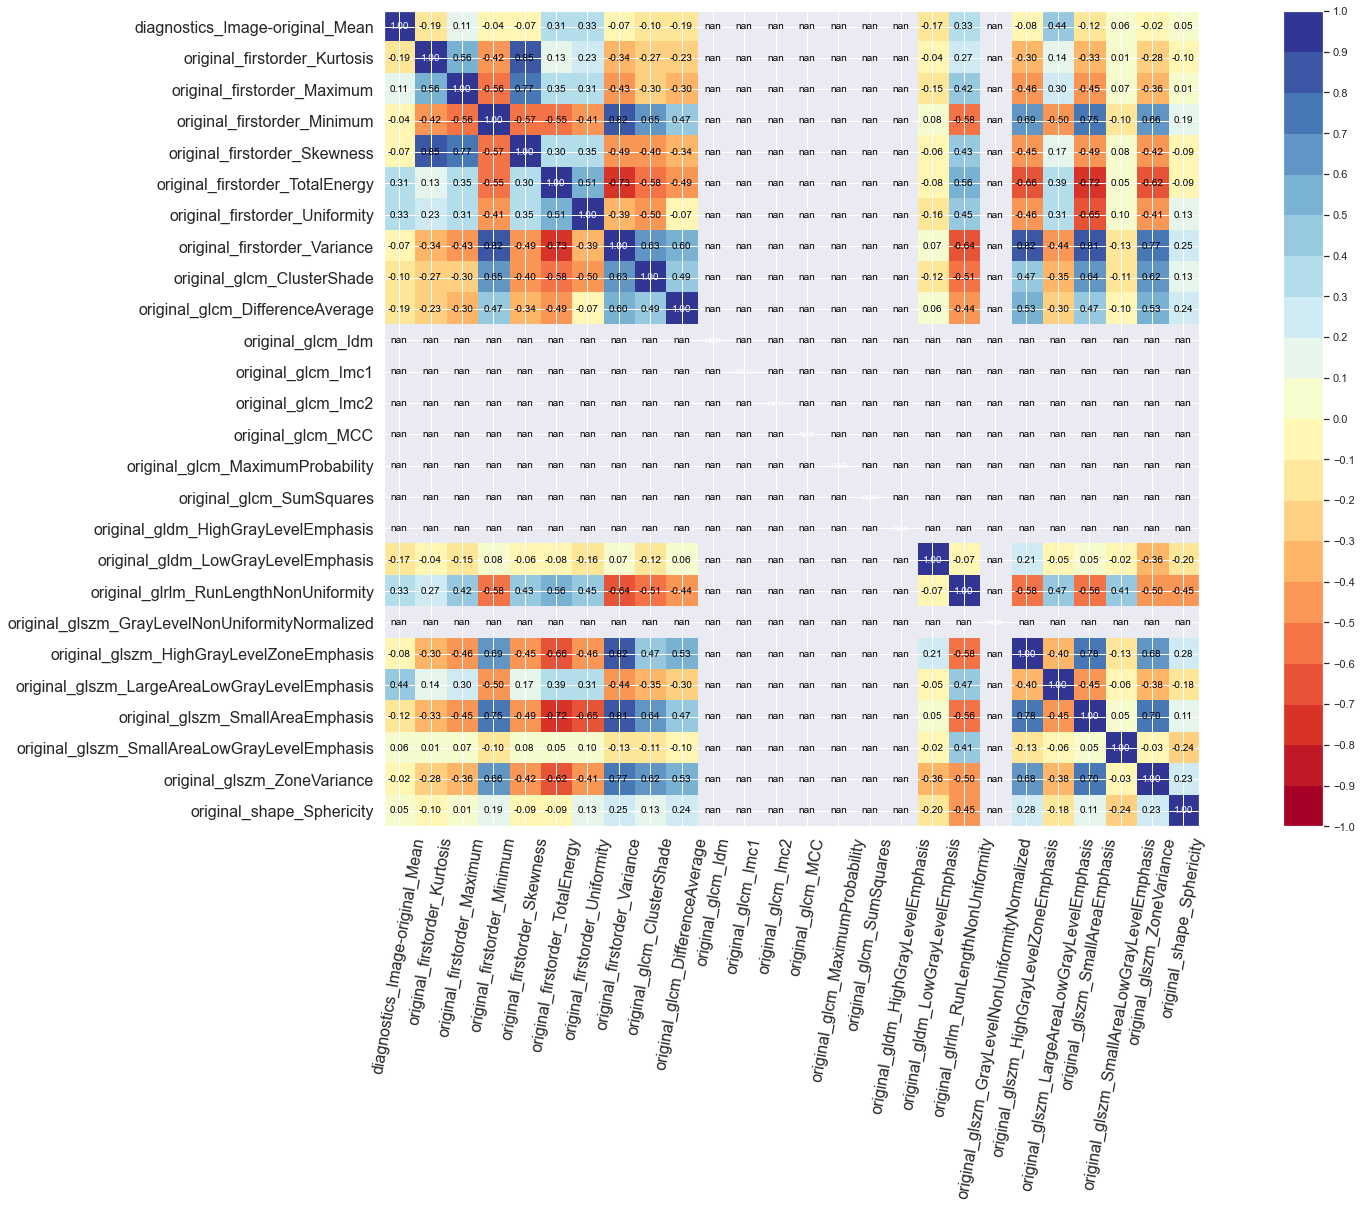

In [15]:
#visualize the correlation matrix
from pysurvival.utils.display import correlation_matrix
correlation_matrix(data2[features], figure_size=(30,15), text_fontsize=10)

In [16]:
from scipy.stats import pearsonr
for cols in data2.columns:
    corrl, dummy = pearsonr(data2[cols], data2['time column'])
    print(cols, ': \t', corrl)


diagnostics_Image-original_Mean : 	 0.14951926713229585
original_shape_Sphericity : 	 0.04942310689678695
original_firstorder_Kurtosis : 	 -0.11969949482294262
original_firstorder_Maximum : 	 0.06972527522540761
original_firstorder_Minimum : 	 -0.05609211177671223
original_firstorder_Skewness : 	 -0.03684175784624082
original_firstorder_TotalEnergy : 	 0.1480260699724745
original_firstorder_Uniformity : 	 0.1417911467821075
original_firstorder_Variance : 	 -0.16094660906489255
original_glcm_ClusterShade : 	 -0.05905494073417278
original_glcm_DifferenceAverage : 	 -0.12964431660634446
original_glcm_Idm : 	 nan
original_glcm_Imc1 : 	 nan
original_glcm_Imc2 : 	 nan
original_glcm_MCC : 	 nan
original_glcm_MaximumProbability : 	 nan
original_glcm_SumSquares : 	 nan
original_gldm_HighGrayLevelEmphasis : 	 nan
original_gldm_LowGrayLevelEmphasis : 	 -0.14015125768682307
original_glrlm_RunLengthNonUniformity : 	 -0.02944613077554878
original_glszm_GrayLevelNonUniformityNormalized : 	 nan
origin

In [17]:
list(data2.columns.values)

['diagnostics_Image-original_Mean',
 'original_shape_Sphericity',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Minimum',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_ClusterShade',
 'original_glcm_DifferenceAverage',
 'original_glcm_Idm',
 'original_glcm_Imc1',
 'original_glcm_Imc2',
 'original_glcm_MCC',
 'original_glcm_MaximumProbability',
 'original_glcm_SumSquares',
 'original_gldm_HighGrayLevelEmphasis',
 'original_gldm_LowGrayLevelEmphasis',
 'original_glrlm_RunLengthNonUniformity',
 'original_glszm_GrayLevelNonUniformityNormalized',
 'original_glszm_HighGrayLevelZoneEmphasis',
 'original_glszm_LargeAreaLowGrayLevelEmphasis',
 'original_glszm_SmallAreaEmphasis',
 'original_glszm_SmallAreaLowGrayLevelEmphasis',
 'original_glszm_ZoneVariance',
 'event column',
 'time column']

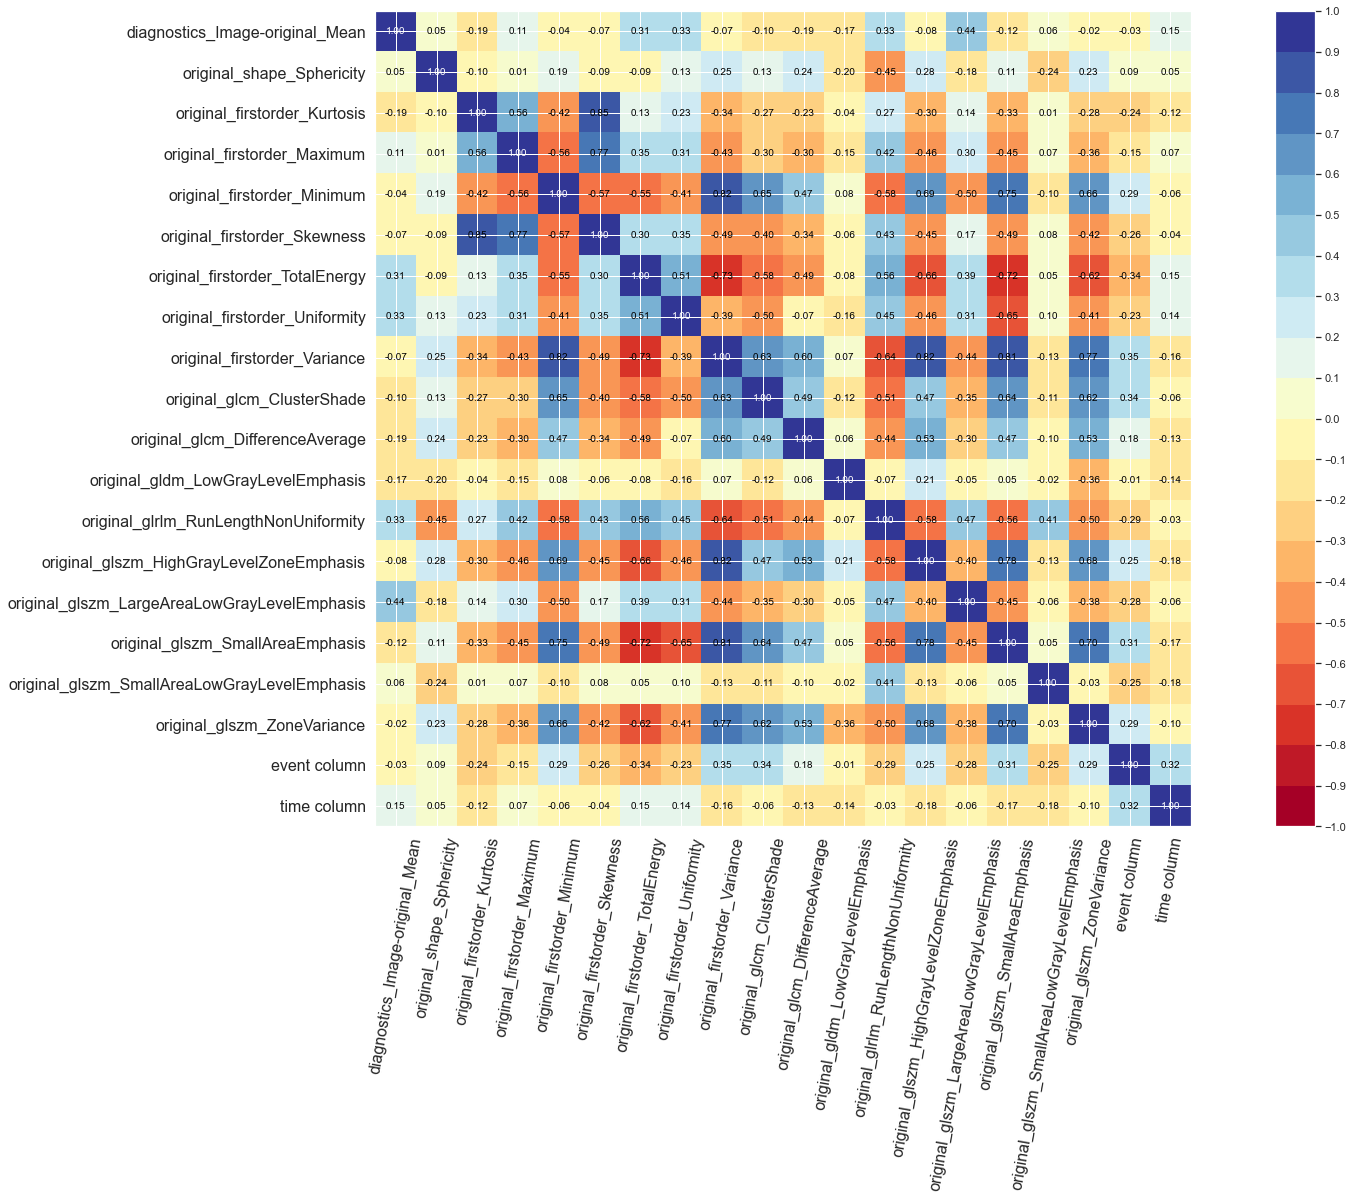

In [18]:
#manually removing zero variance features, automate this in the future for ease of use
data_temp = data2
data2 = data_temp.drop(columns=['original_glcm_Idm', 'original_glcm_Imc1', 'original_glcm_Imc2', 'original_glcm_MCC', 'original_glcm_MaximumProbability', 'original_glcm_SumSquares', 'original_gldm_HighGrayLevelEmphasis', 'original_glszm_GrayLevelNonUniformityNormalized'])
features=np.setdiff1d(data2.columns, [time_column, event_column]).tolist()
correlation_matrix(data2, figure_size=(30,15), text_fontsize=10)

**Some features are uniform across all patients leading to 0 correlation - could consider dropping them to clean up code and improve runtime**

#### Now we are ready to analyze our data 
 we need to define our input (X), time (T) and event (E) columns


In [17]:
# Creating the X, T and E inputs
X = data2[features]

newX=np.setdiff1d(data2.columns, [ event_column]).tolist()
X=data2[newX]
E=data2['event column']

In [19]:
data2['time column']

0      0.8
1      1.1
2     36.3
3      2.0
4      2.5
      ... 
79     3.8
80     9.5
81     4.4
82    13.1
83     4.5
Name: time column, Length: 84, dtype: float64


 1 of kfold 10
C-index: 0.74


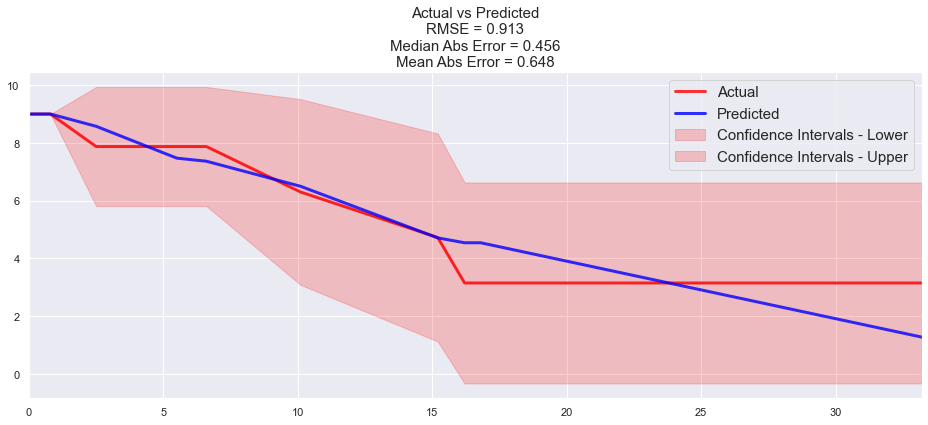

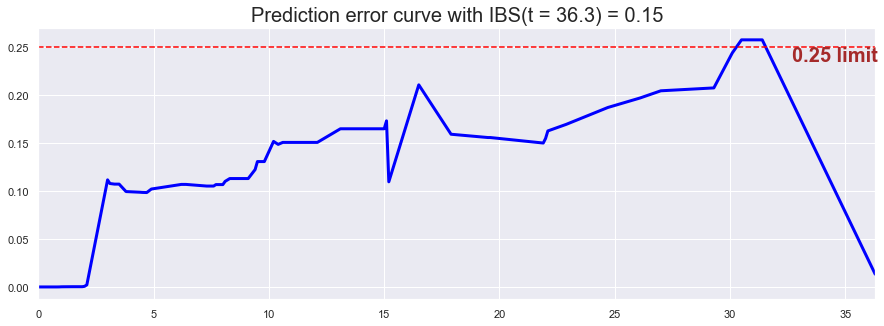

IBS: 0.15

 2 of kfold 10
C-index: 0.64


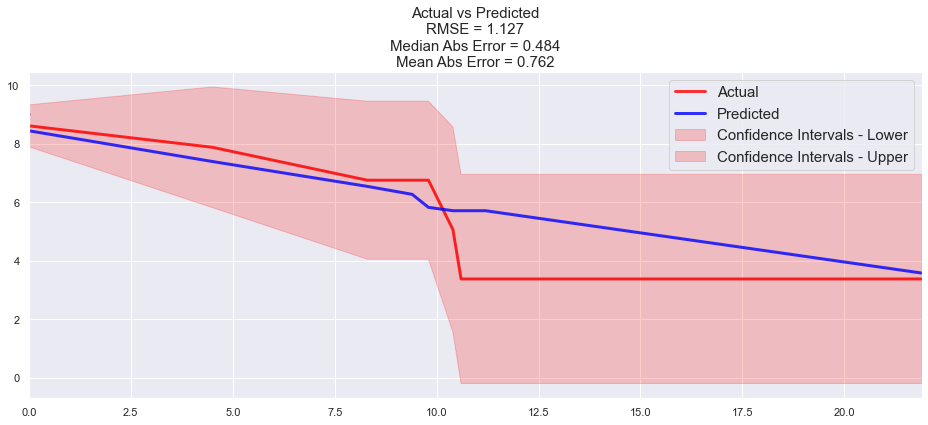

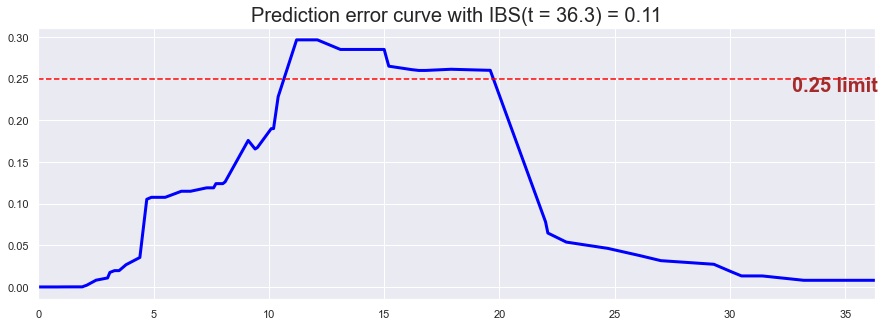

IBS: 0.11

 3 of kfold 10
C-index: 0.74


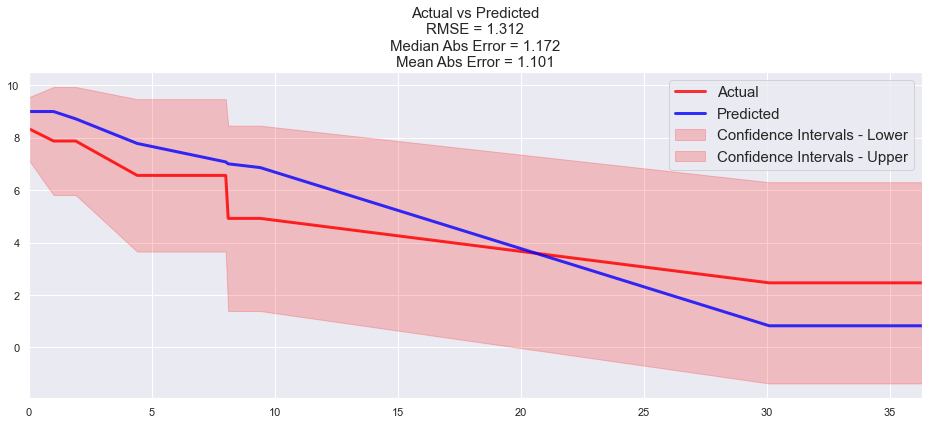

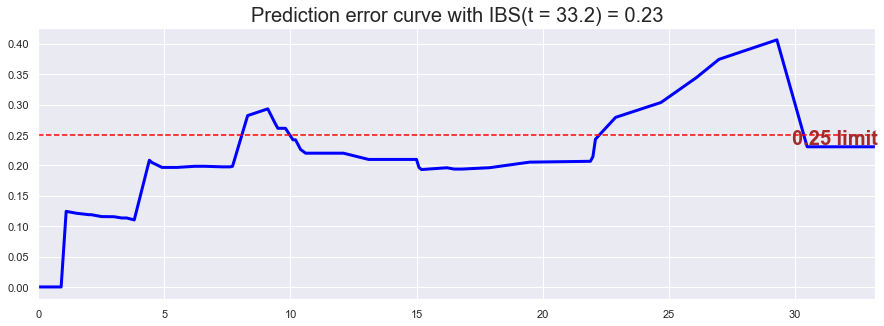

IBS: 0.23

 4 of kfold 10
C-index: 0.61


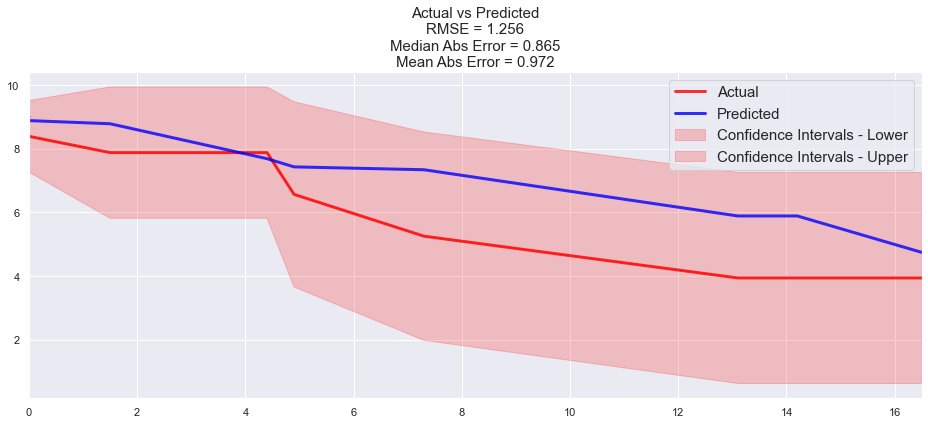

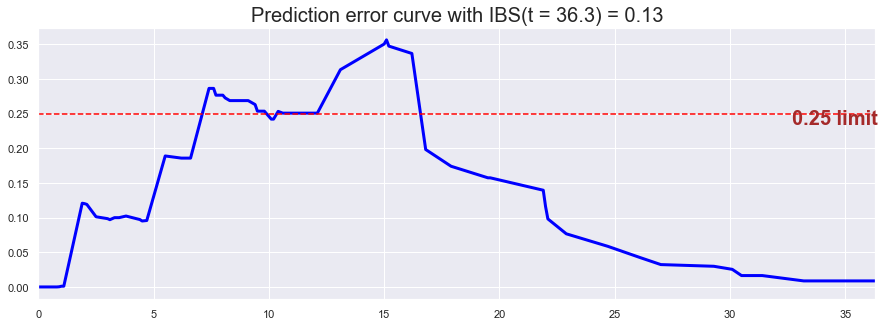

IBS: 0.13

 5 of kfold 10
C-index: 0.66


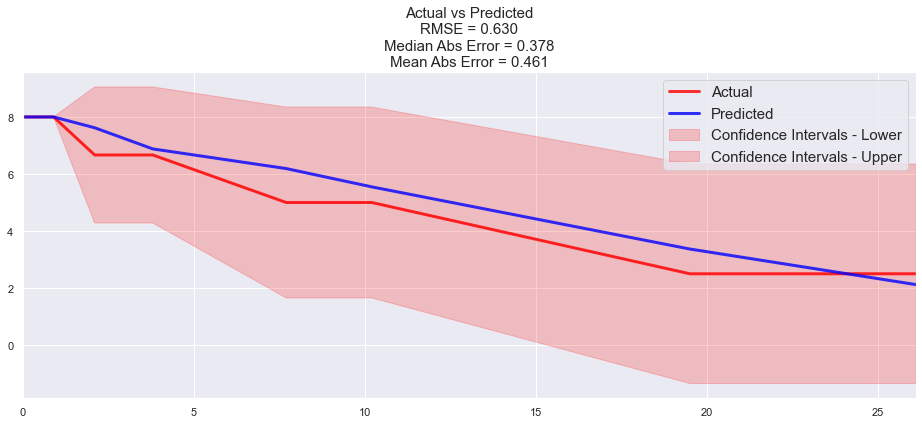

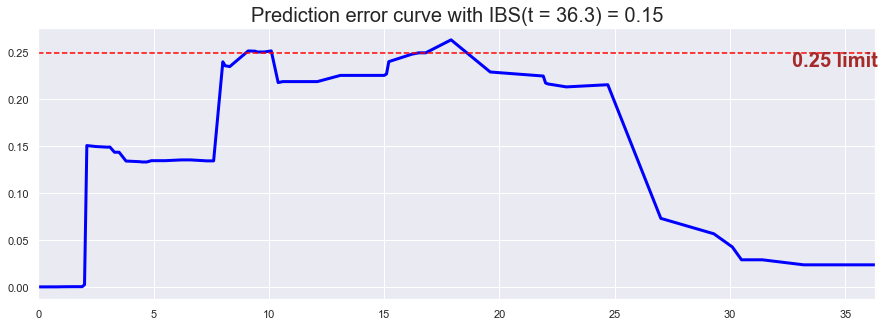

IBS: 0.15

 6 of kfold 10
C-index: 0.76


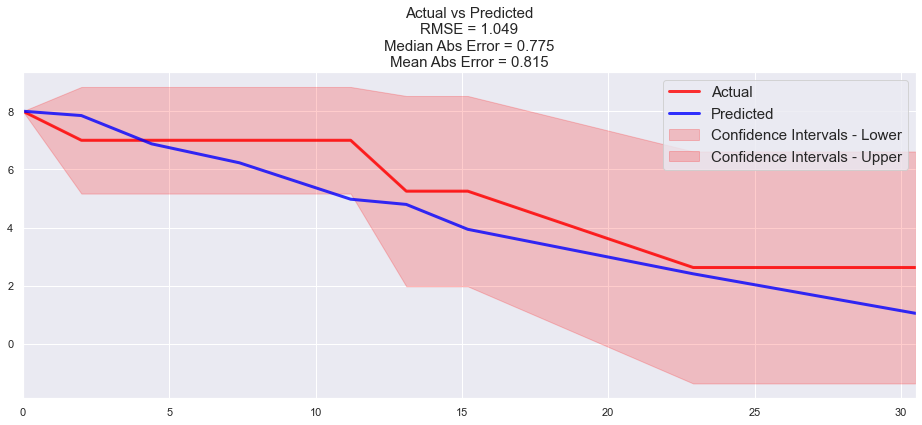

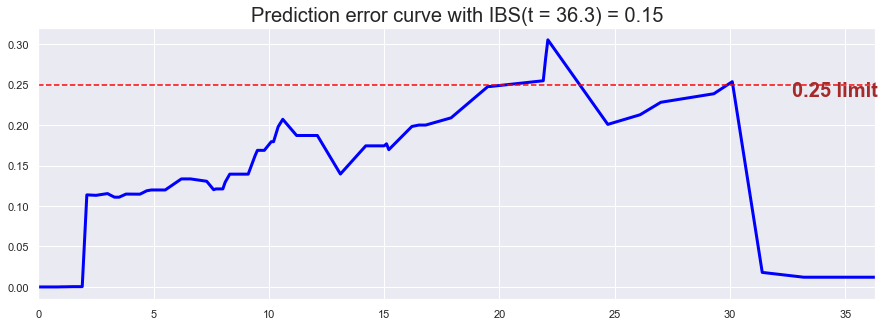

IBS: 0.15

 7 of kfold 10
C-index: 0.74


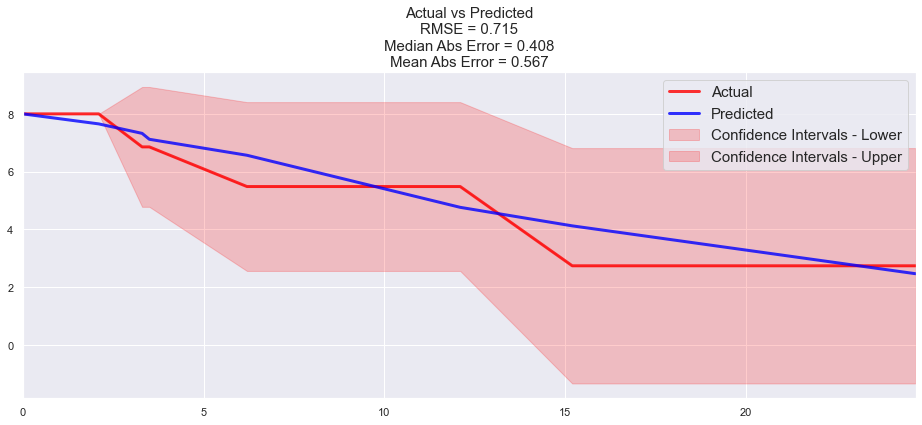

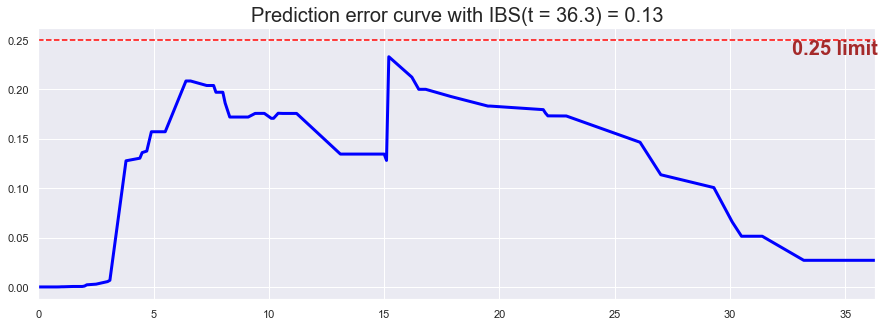

IBS: 0.13

 8 of kfold 10
C-index: 0.88


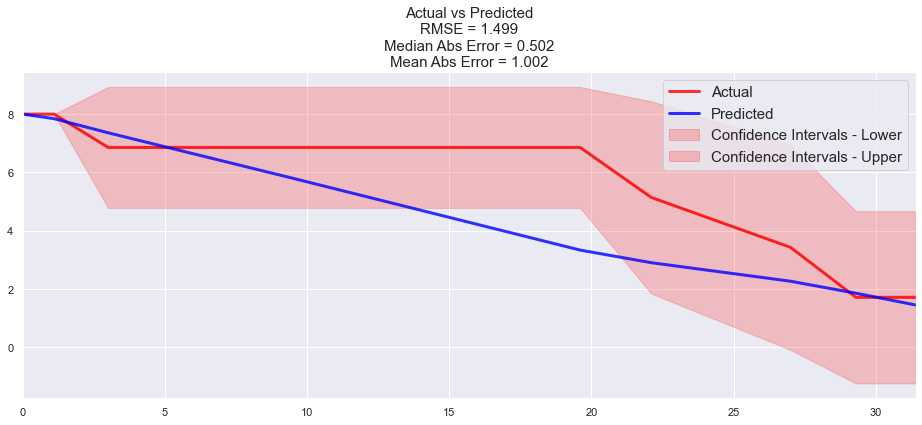

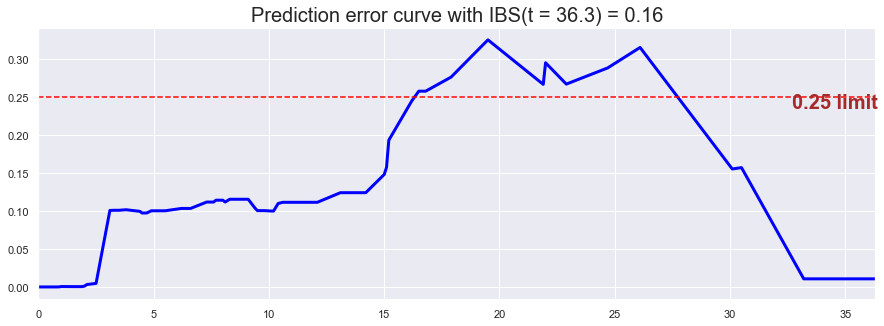

IBS: 0.16

 9 of kfold 10
C-index: 0.50


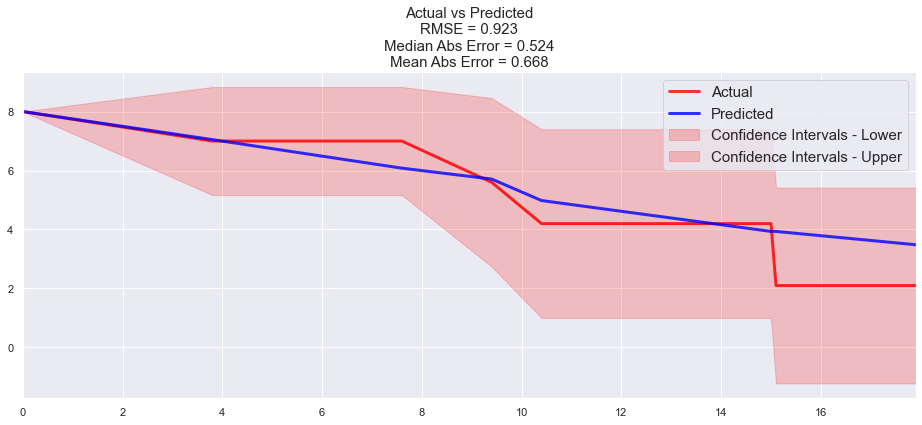

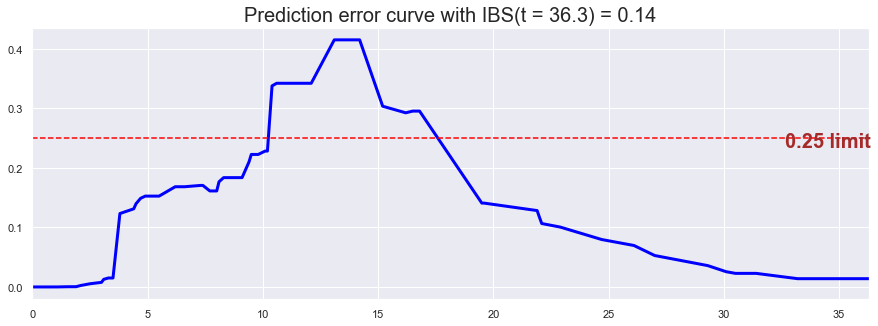

IBS: 0.14

 10 of kfold 10
C-index: 0.74


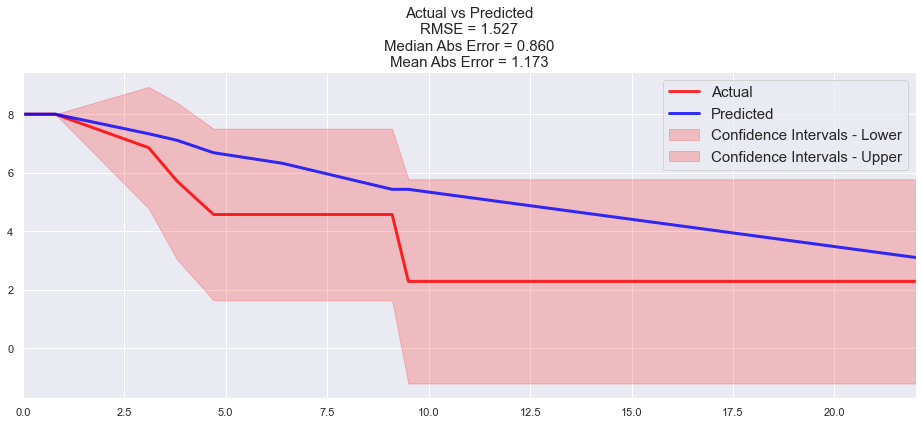

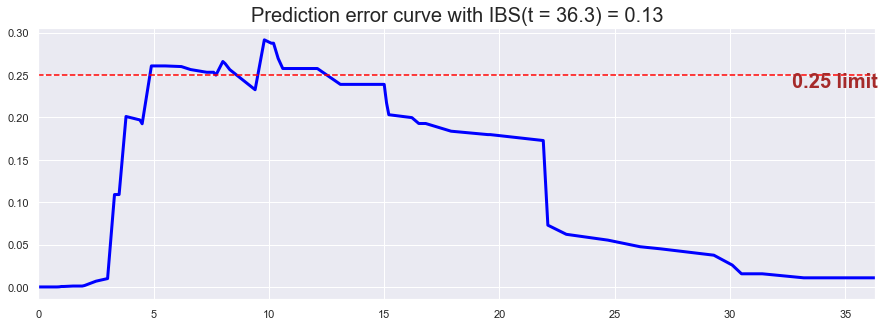

IBS: 0.13


In [18]:
#the random tree variables need to be fine tuned using loops because 
#the grid search CV is not compatible with the PySurvival package

from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import compare_to_actual
from pysurvival.utils.display import integrated_brier_score
i=1
kf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,E):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    X1_train, X1_test=X.loc[train_index], X.loc[test_index]
    X_train, X_test=X1_train[features], X1_test[features]
    T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
    E_train, E_test=E.loc[train_index].values, E.loc[test_index].values
    xst = RandomSurvivalForestModel(num_trees=10) 
    xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = 1,
        min_node_size = 2, num_threads = -1, 
        sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
    c_index = concordance_index(xst, X_test, T_test, E_test)
    print('C-index: {:.2f}'.format(c_index))
    results = compare_to_actual(xst, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
                                metrics = ['rmse', 'mean', 'median'])
    ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
    print('IBS: {:.2f}'.format(ibs))
    i=i+1
   
    

### the importance table allows you to identify the main contributing features

In [46]:
xst.variable_importance_table.head(20)
#the results indicate that we only had 3 variables which were important features

,feature,importance,pct_importance
0,original_firstorder_TotalEnergy,1.063681,0.167928
1,original_glszm_LargeAreaEmphasis,1.054093,0.166414
2,original_glszm_HighGrayLevelZoneEmphasis,1.054093,0.166414
3,original_gldm_LowGrayLevelEmphasis,1.054093,0.166414
4,original_glcm_DifferenceAverage,1.054093,0.166414
5,original_firstorder_Kurtosis,1.054093,0.166414
6,diagnostics_Image-original_Mean,0.000000,0.000000
7,original_glcm_MaximumProbability,0.000000,0.000000
8,original_glszm_ZoneVariance,0.000000,0.000000
9,original_glszm_GrayLevelNonUniformityNormalized,0.000000,0.000000


## I am not sure what the cell below is doing...from the reference notebook, it seems to extract three certain features, but not sure why...(not the most important ones?)

## Anyway, commented out next two cells for now.

In [1]:

#data3=data2.loc[:, ['LBP94', 'LBP116',
#       'FD51',, 'event column']]
#data3

In [2]:
# Creating the X, T and E inputs
#Xnew = data3[['LBP94', 'LBP116','FD51', 'time column']]
#features2=['LBP94', 'LBP116','FD51']

#Xnew[features2]
#Enew=data3['event column']
#Enew
#Xnew['time column']

In [2]:
#the random tree variables need to be fine tuned using loops because 
#the grid search CV is not compatible with the PySurvival package

# from sklearn.model_selection import StratifiedKFold
# from pysurvival.models.survival_forest import RandomSurvivalForestModel
# from pysurvival.utils.metrics import concordance_index
# from pysurvival.utils.display import compare_to_actual
# from pysurvival.utils.display import integrated_brier_score
# i=1
# kf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
# for train_index, test_index in kf.split(Xnew,Enew):
#     print('\n {} of kfold {}'.format(i,kf.n_splits)) 
#     X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
#     X_train, X_test=X1_train[features2], X1_test[features2]
#     T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
#     E_train, E_test=Enew.loc[train_index].values, Enew.loc[test_index].values
#     xst = RandomSurvivalForestModel(num_trees=10) 
#     xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = 1,
#         min_node_size = 2, num_threads = -1, 
#         sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
#         seed = None, save_memory=False )
#     c_index = concordance_index(xst, X_test, T_test, E_test)
#     print('C-index: {:.2f}'.format(c_index))
#     results = compare_to_actual(xst, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
#                                 metrics = ['rmse', 'mean', 'median'])
#     ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
#     print('IBS: {:.2f}'.format(ibs))
#     i=i+1

#### Now we can gridsearch for optimal hyperparameters, also decreasing K-folds to 5 due to sample size

In [20]:
num_tree=(10, 15, 20, 50, 100, 200)
max_depth=(1, 2, 3, 5, 10, 12, 15)
min_node=(1, 2, 3, 5, 10, 12)


In [35]:
# this script searches the RF paramters listed in the cell 29
#prints out the average of 10 K Fold concordance
# originally, this used Xnew from the 3 extracted features
# but this was changed for this dataset
from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from statistics import mean 

# very poorly manually changing the variables to the original one until I figure out
# why 3 specific features were selected in the sampe notebook
# todo: update this later
Xnew = X
Enew = E
features2 = features

for a in num_tree:
    for b in max_depth:
        for c in min_node:
            cc=[]
            kf=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
            i=1
            for train_index, test_index in kf.split(Xnew,Enew):
                X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
                X_train, X_test=X1_train[features2], X1_test[features2]
                T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
                E_train, E_test=Enew.loc[train_index].values, Enew.loc[test_index].values
                xst = RandomSurvivalForestModel(num_trees=a) 
                xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = b,
                min_node_size = c, num_threads = -1, 
                sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
                seed = None, save_memory=False )
                from pysurvival.utils.metrics import concordance_index
                c_index = concordance_index(xst, X_test, T_test, E_test)
                cc.append(c_index)
                i=i+1
            print(a,b, c, mean(cc))
                 

10 1 1 0.743792045545257
10 1 2 0.7003569642957468
10 1 3 0.7328257392155766
10 1 5 0.6994196355674897
10 1 10 0.7169583627565927
10 1 12 0.6699843112337482
10 2 1 0.7209109559251526
10 2 2 0.7714516345104114
10 2 3 0.7600824192861336
10 2 5 0.7247567080318327
10 2 10 0.6794893172271593
10 2 12 0.7261357122374321
10 3 1 0.7716314011306349
10 3 2 0.725723796934687
10 3 3 0.7014125102377207
10 3 5 0.7558717441215769
10 3 10 0.7340412042354639
10 3 12 0.7540024543096674
10 5 1 0.7458497891011049
10 5 2 0.7569136132779808
10 5 3 0.7675432053870272
10 5 5 0.779614970161323
10 5 10 0.7151987510086808
10 5 12 0.6871545215985824
10 10 1 0.7793272147068844
10 10 2 0.6816707930843767
10 10 3 0.7443623797033714
10 10 5 0.762024495150257
10 10 10 0.7033051860570008
10 10 12 0.7548563941231733
10 12 1 0.7524034469342853
10 12 2 0.6979024547487801
10 12 3 0.7063421149254174
10 12 5 0.7770233468577341
10 12 10 0.7394971773341633
10 12 12 0.7483146878191729
10 15 1 0.7179284889963085
10 15 2 0.7780953


 1 of kfold 5


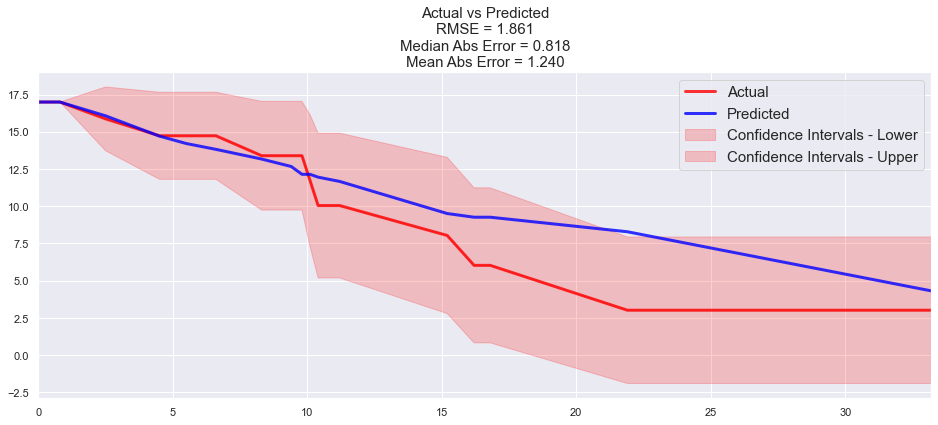

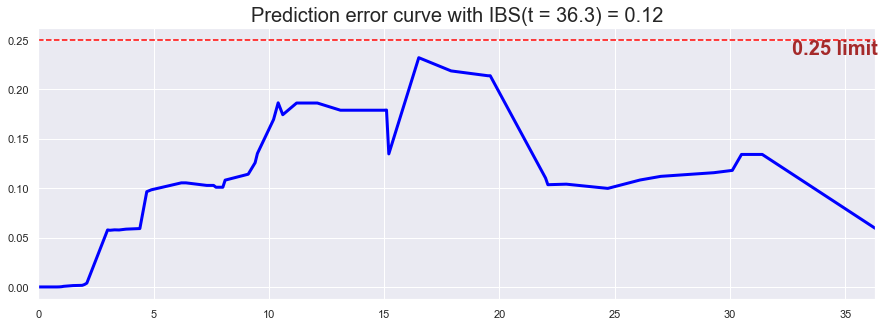

C-index: 0.82
IBS: 0.12

 2 of kfold 5


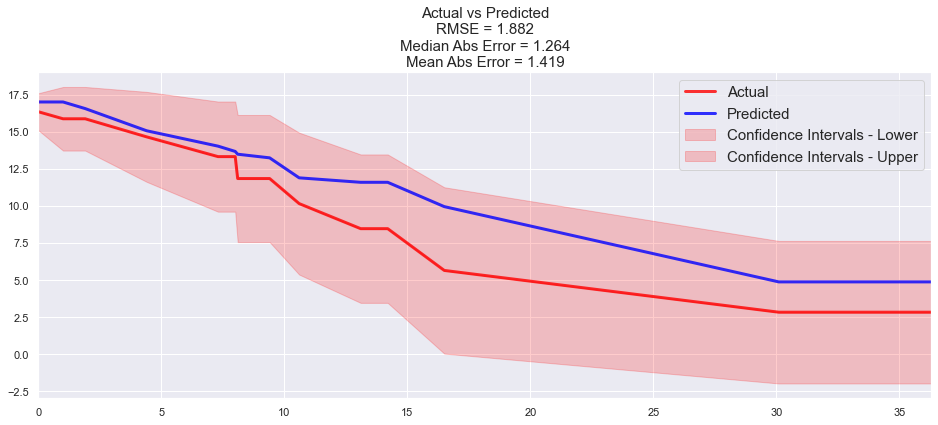

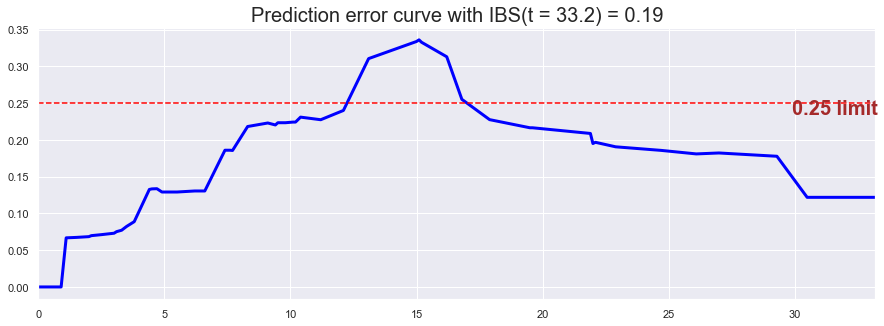

C-index: 0.57
IBS: 0.19

 3 of kfold 5


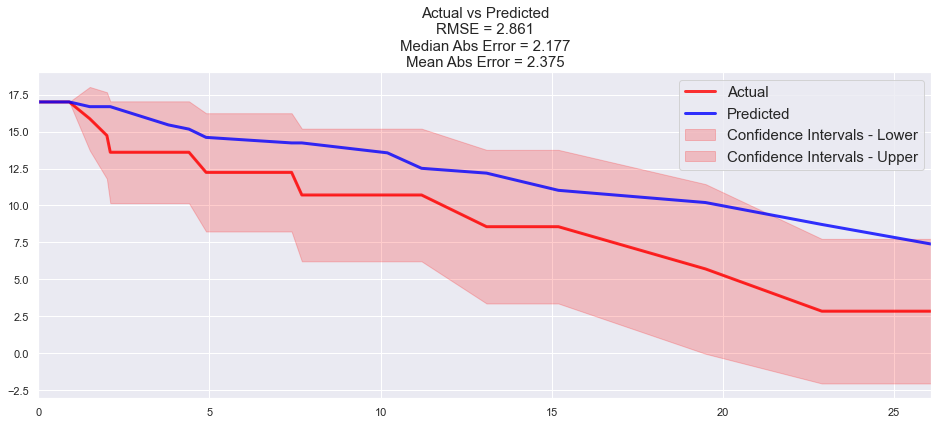

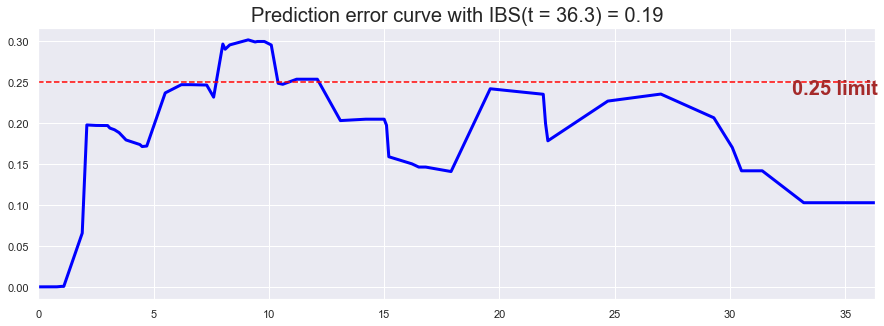

C-index: 0.64
IBS: 0.19

 4 of kfold 5


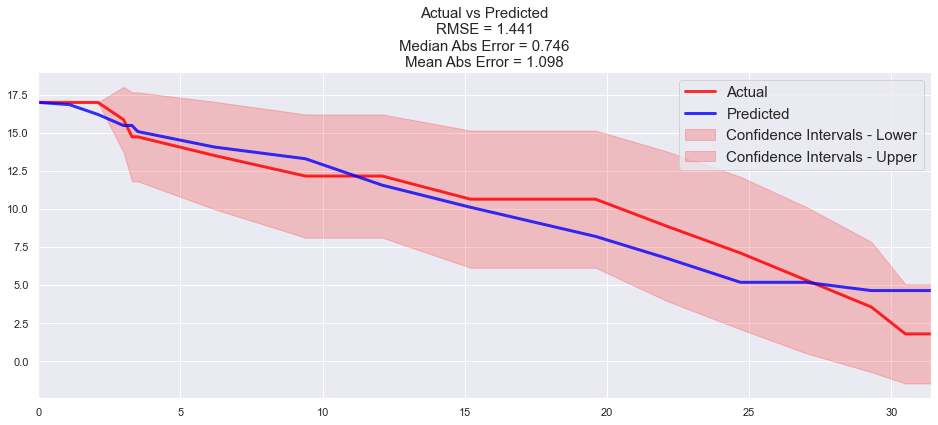

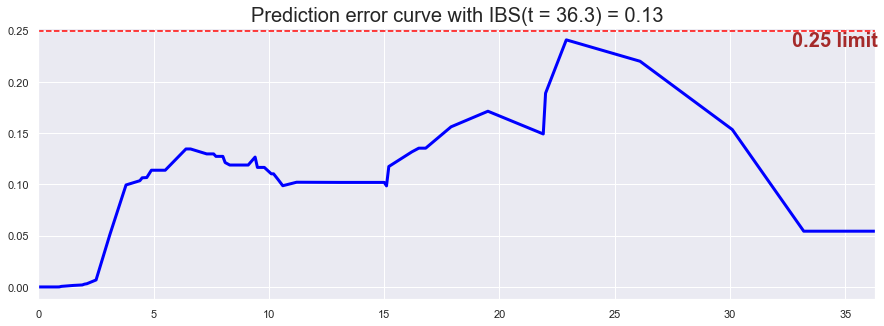

C-index: 0.78
IBS: 0.13

 5 of kfold 5


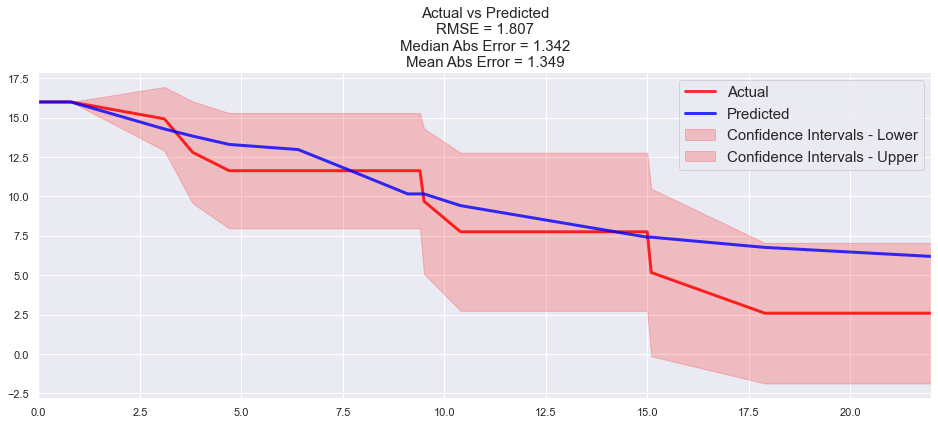

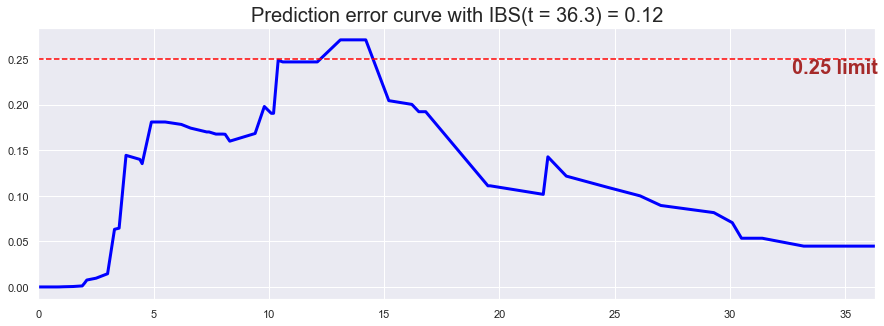

C-index: 0.77
IBS: 0.12


In [23]:
# retraining with best gridsearch hyperparameters, manually entering them as variables, probably can automate this from picking out max acc

# Creating the X, T and E inputs
X = data2[features]

newX=np.setdiff1d(data2.columns, [ event_column]).tolist()
X=data2[newX]
E=data2['event column']

best_num_tree = 15
best_depth = 3
best_min_node = 5
k_folds = 5
from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import compare_to_actual
from pysurvival.utils.display import integrated_brier_score
i=1
kf=StratifiedKFold(n_splits=k_folds, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,E):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    X1_train, X1_test=X.loc[train_index], X.loc[test_index]
    X_train, X_test=X1_train[features], X1_test[features]
    T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
    E_train, E_test=E.loc[train_index].values, E.loc[test_index].values
    xst = RandomSurvivalForestModel(num_trees=best_num_tree) 
    xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = best_depth,
        min_node_size = best_min_node, num_threads = -1, 
        sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
    c_index = concordance_index(xst, X_test, T_test, E_test)
    
    results = compare_to_actual(xst, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
                                metrics = ['rmse', 'mean', 'median'])
    ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
    print('C-index: {:.2f}'.format(c_index))
    print('IBS: {:.2f}'.format(ibs))
    i=i+1

In [24]:
xst.variable_importance_table.head(20)


,feature,importance,pct_importance
0,original_firstorder_Kurtosis,1.848720,0.119955
1,original_firstorder_Variance,1.834250,0.119016
2,original_glrlm_RunLengthNonUniformity,1.509785,0.097963
3,original_gldm_LowGrayLevelEmphasis,1.475697,0.095751
4,original_glszm_SmallAreaLowGrayLevelEmphasis,1.417921,0.092002
5,original_firstorder_Skewness,1.329626,0.086273
6,original_firstorder_Maximum,1.202449,0.078021
7,original_glszm_HighGrayLevelZoneEmphasis,1.035098,0.067163
8,original_glszm_SmallAreaEmphasis,1.035098,0.067163
9,original_firstorder_Minimum,1.022750,0.066361


In [39]:
# getting sample predictions


preds = xst.predict_survival(data1.iloc[:,:-2].transpose())
preds_df = pd.DataFrame(preds).T
preds_df.to_excel('preds.xlsx')

In [64]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

preds = pd.DataFrame(columns = ['Preds','Actual'])
preds['Preds'] = xst.times
actuals = selection_sort(data2['time column'])
preds['Actual'] = data2['time column']
print(preds)


    Preds  Actual
0    -2.4    -2.4
1    -1.8    -1.8
2    -1.4    -1.4
3    -0.9    -0.9
4     0.8     0.8
5     0.9     0.8
6     1.0     0.9
7     1.1     1.0
8     1.5     1.1
9     1.9     1.5
10    2.0     1.9
11    2.1     2.0
12    2.5     2.1
13    3.0     2.1
14    3.3     2.5
15    3.5     3.0
16    3.8     3.1
17    4.4     3.3
18    4.5     3.5
19    4.9     3.8
20    5.5     3.8
21    6.2     3.8
22    6.6     3.8
23    7.3     4.4
24    7.4     4.4
25    7.7     4.4
26    8.0     4.5
27    8.1     4.7
28    8.3     4.9
29    9.4     5.5
30    9.8     6.2
31   10.1     6.2
32   10.2     6.4
33   10.4     6.6
34   10.6     7.3
35   11.2     7.4
36   12.1     7.6
37   13.1     7.7
38   14.2     8.0
39   15.2     8.1
40   16.2     8.3
41   16.5     9.1
42   16.8     9.4
43   19.5     9.4
44   19.6     9.4
45   21.9     9.4
46   22.1     9.5
47   22.9     9.8
48   24.7    10.1
49   26.1    10.2
50   27.0    10.4
51   29.3    10.4
52   30.1    10.6
53   30.5    11.2
54   31.4 

3.494355248975368e-10